## Statystyczna analiza danych - ćwiczenia

### Projekt zaliczeniowy

Karol Augustowski 182743, grupa 3
IwB, magisterskie, niestacjonarne



### Import bibliotek używanych w projekcie


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


### 1. Wstęp

Celem projektu jest ukazanie przypadku zastosowania eksploracyjnej analizy danych.
Dane użyte do niniejszej pracy pochodzą ze strony
[Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand).
Analizowany dataset dotyczy rezerwacji pobytu w dwóch hotelach (City Hotel i Resort Hotel).
Obserwacje zawierają między innymi
takie informacje jak długość pobytu, liczbę osób dorosłych, wyprzedzenie rezerwacji
(liczbę dni pomiędzy datą przyjazdu i datą rezerwacji), narodowość gości hotelowych, wybrany plan wyżywienia oraz status rezerwacji.

### 2. Przygotowanie danych

Pierwszym krokiem jest zaimportowanie danych z pliku csv. Dostępne dane zawierają 32 kolumny z danymi.

In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

W celu ułatwienia analizy zdecydowano się na pominięcie kolumn zawierających mniej
interesujące dane w celu uproszczenia analizy. Dodatkowo dodano kolumnę zawierającą całkowitą długość pobytu,
wcześniej były wyróżnione liczby dni pobytu w weekendy oraz w czasie tygodnia pracującego. Liczbę dzieci oraz niemowląt występujące osobno zastąpiono pojedynczą kolumną zawierającą całkowitą liczbę dzieci (bez wyróżnania niemowląt).

In [3]:
los_column = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
hotel_df['length_of_stay'] = los_column
children_column = hotel_df['children'] + hotel_df['babies']
hotel_df['children_total'] = children_column
columns_to_drop = ['assigned_room_type', 'company', 'reserved_room_type', 'deposit_type',
                   'previous_bookings_not_canceled', 'previous_cancellations', 'agent',
                   'required_car_parking_spaces', 'total_of_special_requests', 'babies', 'children',
                   'days_in_waiting_list', 'deposit_type', 'reservation_status_date', 'booking_changes']
hotel_df = hotel_df.drop(columns_to_drop, axis=1)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_year          119390 non-null  int64  
 4   arrival_date_month         119390 non-null  object 
 5   arrival_date_week_number   119390 non-null  int64  
 6   arrival_date_day_of_month  119390 non-null  int64  
 7   stays_in_weekend_nights    119390 non-null  int64  
 8   stays_in_week_nights       119390 non-null  int64  
 9   adults                     119390 non-null  int64  
 10  meal                       119390 non-null  object 
 11  country                    118902 non-null  object 
 12  market_segment             119390 non-null  object 
 13  distribution_channel       11

Po pozbyciu się zbędnych kolumn (nie poddawanych analizie w niniejszym projekcie) sprawdzono brakujące wartości.

In [4]:
hotel_df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
meal                           0
country                      488
market_segment                 0
distribution_channel           0
is_repeated_guest              0
customer_type                  0
adr                            0
reservation_status             0
length_of_stay                 0
children_total                 4
dtype: int64

Brakujące dane uzupełniono poprzez wypełnienie zerami dla liczby dzieci dla rezerwacji. W przypadku kolumny zawierającej kod kraju, z jakiego byli goście brakujące wartości uzupełniano najczęściej występującą wartością.

In [5]:
hotel_df['children_total'] = hotel_df['children_total'].fillna(0)
hotel_df['country'] = hotel_df['country'].fillna(hotel_df['country'].mode().index[0])

Po powyższych zabiegach zredukowano liczbę kolumn w wybranym zestawie danych z 32 do 19.

Histogram przedstawia liczbę rezerwacji przypadającą na rodzaj hotelu, dla którego dostępne były dane, "City Hotel" jest hotelem znajdującym się w mieście, natomiast "Resort Hotel" jest hotelem, który można określić mianem wakacyjnego/wypoczynkowego. Z dostępnych danych wynika, iż hotel miejski w analizowanym okresie miał około dwukrotnie większą liczbę rezerwacji. Warto zaznaczyć fakt, że ciężko na podstawie dostępnych danych wnioskować o obłożeniu hoteli z uwagi na brak informacji o całkowitej liczbie miejsc dla poszczególnych placówek. 

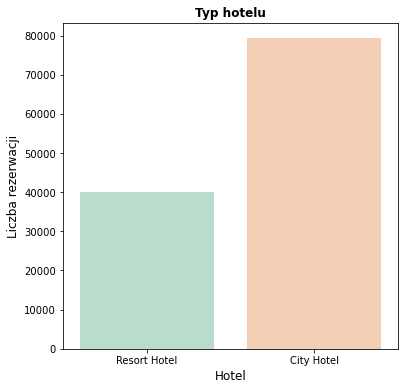

In [6]:
plt.figure(figsize=(6, 6))
sns.countplot(x='hotel', data=hotel_df, palette='Pastel2')
plt.title('Typ hotelu', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12);

Kolejny histogram przedstawia liczbę anulowanych rezerwacji.

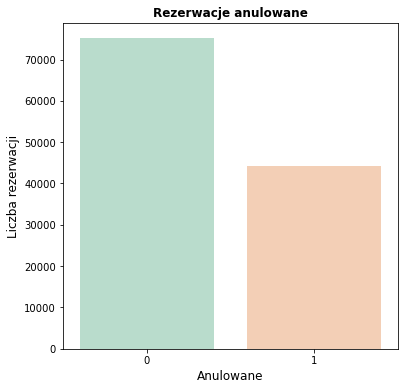

In [7]:
hotel_df['is_canceled'].unique()
plt.figure(figsize=(6, 6))
cancelled = sns.countplot(x='is_canceled', data=hotel_df, palette='Pastel2')
plt.title('Rezerwacje anulowane', weight='bold')
plt.xlabel('Anulowane', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12);

Następnym graficznym przedstawieniem analizowanego zbioru danych jest wykres skrzypcowy przedstawiający
rozkład wartości "lead time" (jest to czas wyrażony w liczbie dni pomiędzy datą wykonania
rezerwacji i datą której dotyczy dana rezerwacja) dla poszczególnych lat oraz z zaznaczeniem
typu hotelu. Analizując poniższy wykres można zauważyć dominującą liczbę rezerwacji ze stosunkowo
małym lead time'm dla hotelu Resort. Fakt ten może być spowodowany klientami korzystającymi z ofert
last minute. Dla hotelu miejskiego występuje więcej rezerwacji wysokim czasem wyprzedzenia, może być to spowodowane wydarzeniami cyklicznymi
takimi jak konferencje, festiwale.

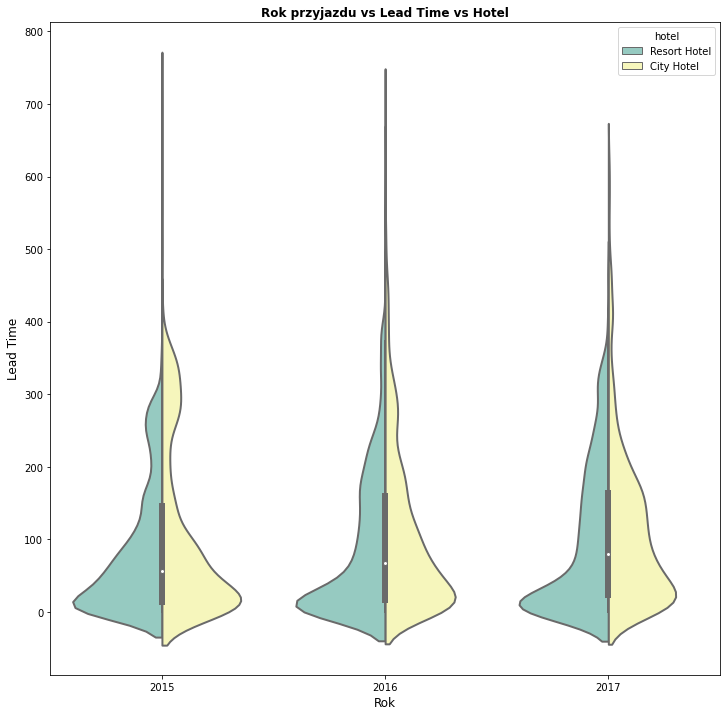

In [8]:
plt.figure(figsize=(12, 12))
sns.violinplot(x='arrival_date_year', y='lead_time', hue="hotel", data=hotel_df, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner='box', split=True)
plt.title('Rok przyjazdu vs Lead Time vs Hotel', weight='bold')
plt.xlabel('Rok', fontsize=12)
plt.ylabel('Lead Time', fontsize=12);

Miesiące w postaci stringów zastąpiono przez numery odpowiadające miesiącom w celu łatwiejszego korzystanie i sortowania danych.

In [9]:
hotel_df['arrival_date_month'].replace({'January': 1,
                                        'February': 2,
                                        'March': 3,
                                        'April': 4,
                                        'May': 5,
                                        'June': 6,
                                        'July': 7,
                                        'August': 8,
                                        'September': 9,
                                        'October': 10,
                                        'November': 11,
                                        'December': 12}, inplace=True)

Na widocznych poniżej wykresach zaprezentowano liczbę rezerwacji dla poszczególnych miesięcy oraz lat z podziałem na typ hotelu.
Analizując wykres można zauważyć mniejsze zainteresowanie wynajmem pokoi w miesiącach zimowych oraz większe w miesiącach wakacyjnych.


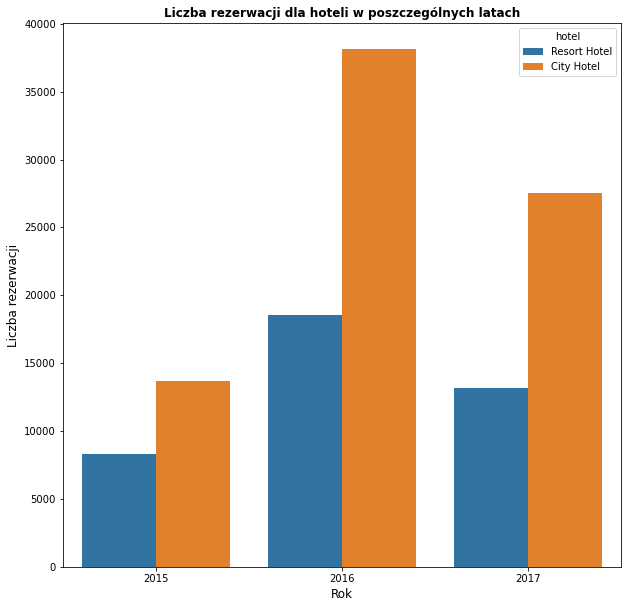

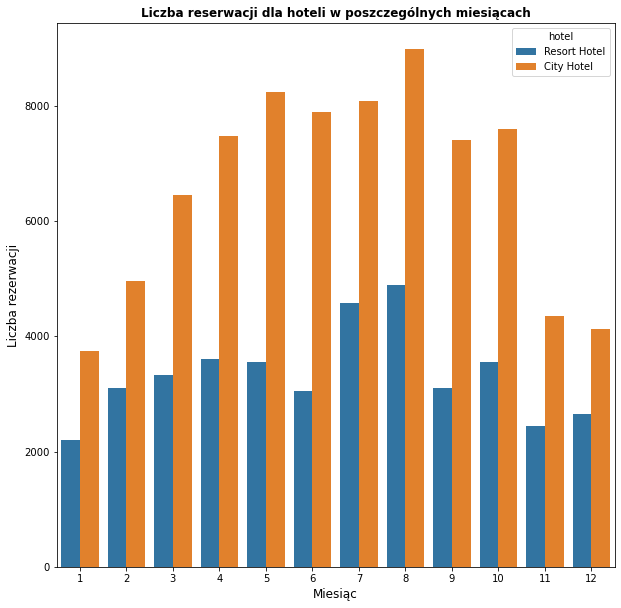

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(data=hotel_df,
              x='arrival_date_year', hue='hotel')
plt.title('Liczba rezerwacji dla hoteli w poszczególnych latach', weight='bold')
plt.xlabel('Rok', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(data=hotel_df,
              x='arrival_date_month', hue='hotel')
plt.title('Liczba reserwacji dla hoteli w poszczególnych miesiącach', weight='bold')
plt.xlabel('Miesiąc', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)
plt.show()

Kolejno pokazano wykres słupkowy skumulowany dla liczby rezerwacji w poszczególnych miesiącach z uwzględnieniem rodzaju pobytu.

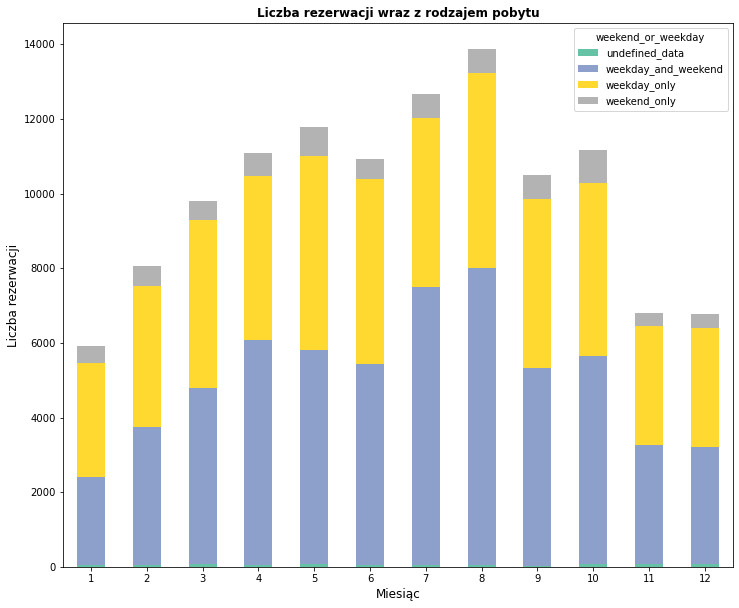

In [11]:
pd.options.mode.chained_assignment = None


def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'weekend_only'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'weekday_only'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'undefined_data'


week_function(hotel_df['stays_in_weekend_nights'], hotel_df['stays_in_week_nights'], hotel_df)
group_data = hotel_df.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending=True).plot(kind='bar', stacked=True, cmap='Set2',
                                                                  figsize=(12, 10))
plt.title('Liczba rezerwacji wraz z rodzajem pobytu', weight='bold')
plt.xlabel('Miesiąc', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Liczba rezerwacji', fontsize=12);

Następny wykres ukazuje liczbę ponownych rezerwacji przez gości, którzy wcześniej korzystali z danych hoteli.
Dla obu hoteli liczba ta jest podobna, należy jednak pamiętać, iż w przypadku hotelu miejskiego liczba rezerwacji jest dwukrotnie większa, więc procentowo wartość jest stosunkowo niewielka.

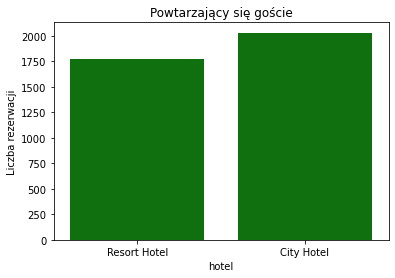

In [12]:
hotel_repeated = hotel_df[hotel_df['is_repeated_guest'] == 1]
sns.countplot(x="hotel", data=hotel_repeated, color='green')
plt.title("Powtarzający się goście")
plt.ylabel("Liczba rezerwacji")
plt.show()

Kolejny wykres przedstawia końcowy status rezerwacji (Check-out - gość się pojawił, Cancelled - rezerwacja została anulowana, No-Show - rezerwacja nie została anulowana lecz gość się nie pojawił)

Text(0, 0.5, 'Liczba rezerwacji')

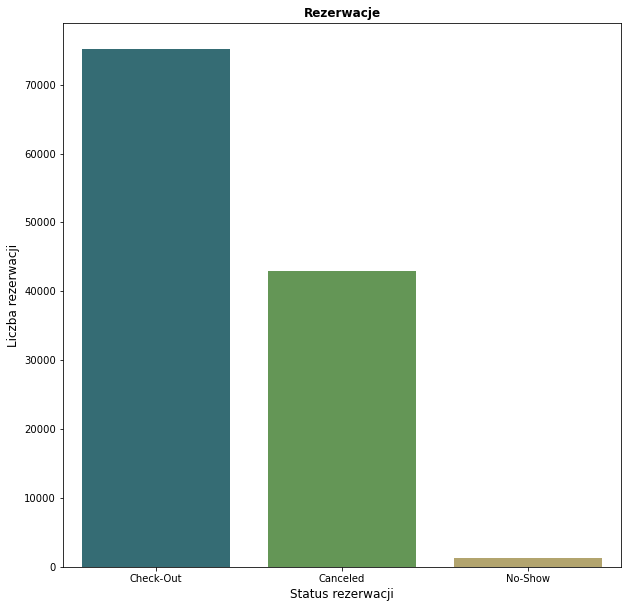

In [13]:
plt.figure(figsize=(10, 10))
sns.countplot(x='reservation_status', data=hotel_df, palette='gist_earth')
plt.title('Rezerwacje', weight='bold')
plt.xlabel('Status rezerwacji', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)

Widoczny poniżej wykres przedstawia udział poszczególnych kanałów dystrybucji dla rezerwacji, aby uwidocznić na wykresie wszystkie występujące opcje zdecydowano się na zastosowanie skali logarytmicznej dla osi y.
Znaczącą przewagę nad pozostałymi wykazuje TA/TO ("Travel Agents" , "Tour Operators"), a więc biura podróży i organizatorzy wycieczek.

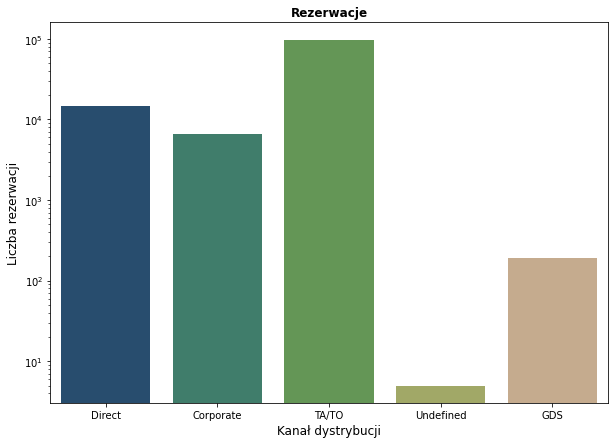

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(x='distribution_channel', data=hotel_df, palette='gist_earth')
plt.title('Rezerwacje', weight='bold')
plt.xlabel('Kanał dystrybucji', fontsize=12)
plt.yscale('log')
plt.ylabel('Liczba rezerwacji', fontsize=12);

Kolejno stworzono wykres reprezentujący podział rezerwacji według segmentu rynkowego.
Dominującym segmentem rynkowych analizowanych hoteli są biura podróży oraz rezerwacje grupowe.

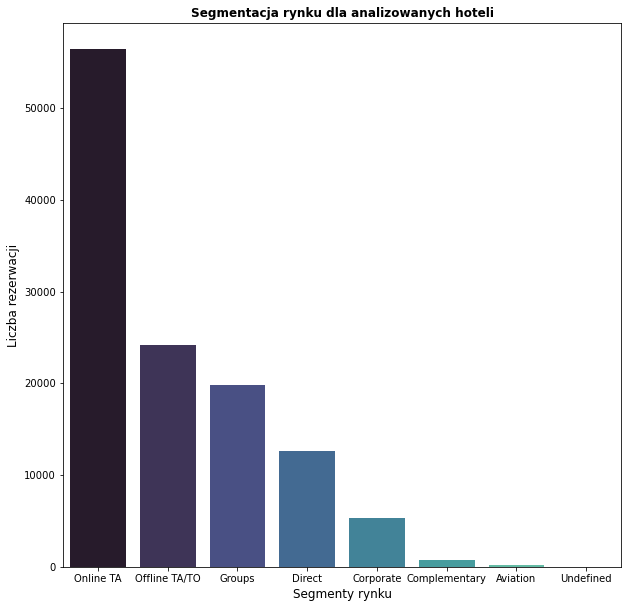

In [15]:
plt.figure(figsize=(10, 10))
sns.countplot(x=hotel_df['market_segment'], palette='mako',
              order=pd.value_counts(hotel_df['market_segment']).index)
plt.title('Segmentacja rynku dla analizowanych hoteli', weight='bold')
plt.xlabel('Segmenty rynku', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12);


Rozłożenie rezerwacji względem rodzaju klientów przedstawia poniższy wykres.

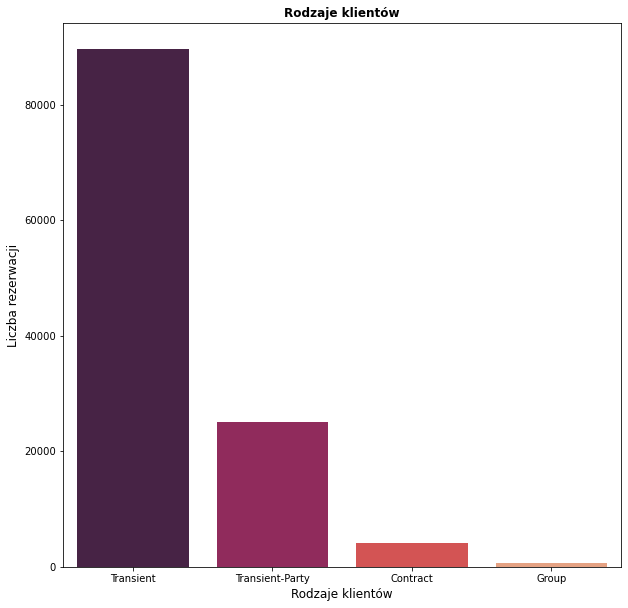

In [16]:
plt.figure(figsize=(10, 10))
sns.countplot(x=hotel_df['customer_type'], palette='rocket',
              order=pd.value_counts(hotel_df['customer_type']).index)
plt.title('Rodzaje klientów', weight='bold')
plt.xlabel('Rodzaje klientów', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12);

Dla ułatwienia dalszej analizy stworzono dodatkową kolumnę, zawierającą informacje o tym, czy rezerwacja uwzględniała dzieci czy nie.

In [17]:
with_children_column = hotel_df['children_total'] > 0

hotel_df['with_children'] = with_children_column

Na wykresach poniżej przedstawiono procentowe liczby rezerwacji dla wybranych przedziałów długości pobytu dla hoteli.
Dwa poniższe wykresy przedstawiają dane uwzględniające wyłącznie rezerwacje dokonywane z dziećmi.
Analizując poniższe wizualizacje danych można zauważyc, iż w przypadku hotelu wakacyjnego odnotowuje się większy procent pobytów dłuższych niż w przypadku hotelu miejskiego.
W przypadku hotelu wakacyjnego widać również zwiększony procent pobytów jedno/dwutygodniowych w stosunku do pobytów o krótszym okresie czasu.

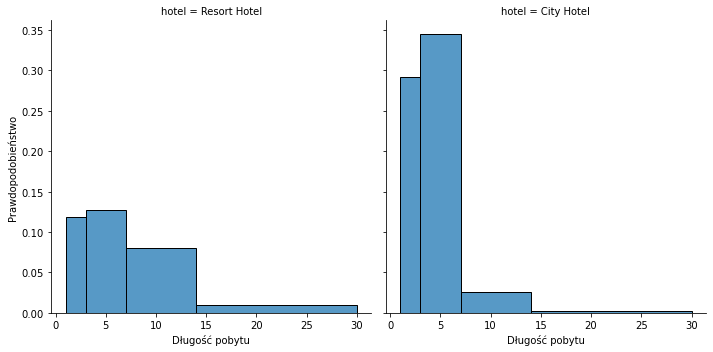

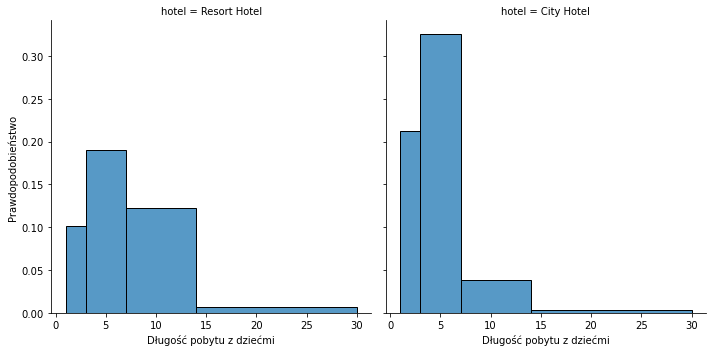

In [18]:
dist = sns.displot(hotel_df,
                   x='length_of_stay', col='hotel', bins=[1, 3, 7, 14, 30], kind="hist", stat='probability')

dist.set_axis_labels("Długość pobytu", "Prawdopodobieństwo")
plt.show()

dist_children = sns.displot(hotel_df[hotel_df['with_children'] == True],
                            x='length_of_stay', col='hotel', bins=[1, 3, 7, 14, 30], kind="hist", stat='probability')

dist_children.set_axis_labels("Długość pobytu z dziećmi", "Prawdopodobieństwo")
plt.show()

Podstawowe statystyki opisowe danych liczbowych

Na podstawie poniższej tabeli można stwierdzić m.in., że największa grupa dorosłych z pojedynczej rezerwacji liczyła 55 osób, największe wyprzedzenie rezerwacji wynosiło 737 dni, średnia długość pobytu w analizowanych hotelach to prawie 3.5 dnia.
Co czwarta rezerwacja była wykonywana z wyprzedzeniem mniejszym bądź równym 18 dni. Interpretując kwartyle dla liczby dorosłych można stwierdzić, iż dla znacznej części rezerwacji były one wykonywane dla par.

In [19]:
hotel_numeric = hotel_df[
    ['adr', 'children_total', 'adults', 'stays_in_week_nights', 'stays_in_weekend_nights', 'lead_time',
     'length_of_stay']]
hotel_numeric.describe().round(2)

,adr,children_total,adults,stays_in_week_nights,stays_in_weekend_nights,lead_time,length_of_stay
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00
mean,101.83,0.11,1.86,2.50,0.93,104.01,3.43
std,50.54,0.41,0.58,1.91,1.00,106.86,2.56
min,-6.38,0.00,0.00,0.00,0.00,0.00,0.00
25%,69.29,0.00,2.00,1.00,0.00,18.00,2.00
50%,94.58,0.00,2.00,2.00,1.00,69.00,3.00
75%,126.00,0.00,2.00,3.00,2.00,160.00,4.00
max,5400.00,10.00,55.00,50.00,19.00,737.00,69.00


Poniżej przedstawiono macierz korelacji w postaci heatmapy z wartościami. Występujące wartości liczbowe są słabo skorelowane, za wyjątkiem oczywiście korelacji długości
pobytu oraz liczby nocy w tygodniu/ weekendowych, na podstawie których obliczana była długość pobytu.

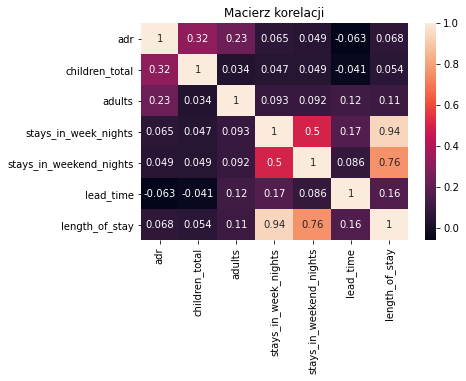

In [20]:
correlation = hotel_numeric.corr()
sns.heatmap(correlation, annot=True)
plt.title("Macierz korelacji");

Najczęściej wybierane plany wyżywienia przedstawiono na wykresie kołowym.
Zdecydowaną większość stanowiło BB (Bed & Breakfast), następne były FB (Full Board) oraz HB (Half-Board)

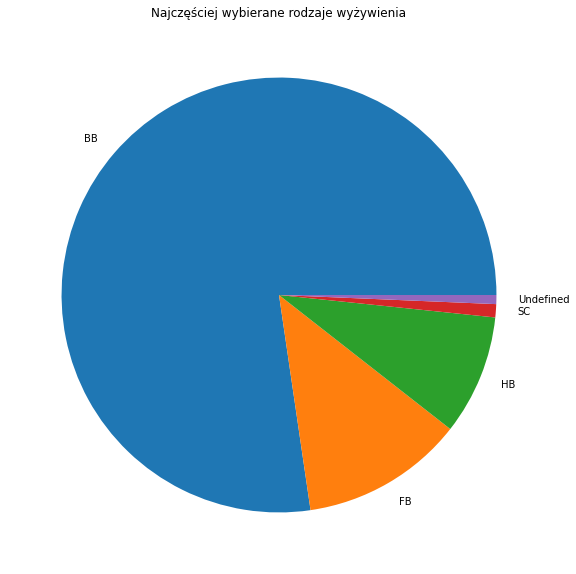

In [21]:
meal_types = hotel_df['meal'].unique()
size = hotel_df['meal'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(size, labels=meal_types)
plt.title("Najczęściej wybierane rodzaje wyżywienia")
plt.show()

Tabela przedstawia jaki procent danego planu wyżywienia przypada na konkretny hotel.
W przypadku hotelu miejskiego wybrano dwukrotnie więcej BB (samych śniadań), pełne wyżywienie niemal zawsze było wybierane w przypadku hotelu wakacyjnego.
Opcję bez wyżywienia w 99% wybierano w hotelu miejskim.

In [22]:
group_meal_data = hotel_df.groupby(['hotel', 'meal']).size().unstack(fill_value=0).transform(lambda x: x / x.sum())
group_meal_data.applymap('{:.2f}'.format)


meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.67,0.06,0.44,0.99,0.00
Resort Hotel,0.33,0.94,0.56,0.01,1.00


Kolejno przedstawiono liczbę gośći z poszczególnych krajów (pokazano 7 dominujących narodowości).
Patrząc na zobrazowane dane można z dużym prawdopodobieństwem stwierdzić, iż analizowane obiekty znajdują się w Portugalii.

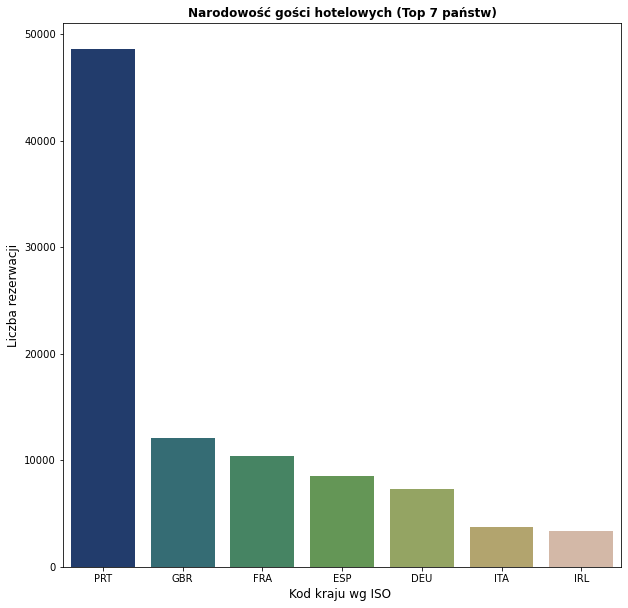

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(x='country', data=hotel_df,
              order=pd.value_counts(hotel_df['country']).iloc[:7].index, palette="gist_earth")
plt.title('Narodowość gości hotelowych (Top 7 państw)', weight='bold')
plt.xlabel('Kod kraju wg ISO ', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12);

### 3. Analiza skupień na podstawie algorytmu K-means

Analiza skupień zostanie przeprowadzona na podstawie ADR oraz Lead Time'u.
ADR określa średni dzienny przychód z zajmowanego pokoju. Na początku wydzielono data frame składający się z kolumn, które będą brane pod uwagę podczas analizy skupień.
Do wybrania optymalnej liczby skupień zostanie zastosowana metoda heurystyczna, "elbow method".

In [24]:
hotel_adr_lt = hotel_df[['lead_time', 'adr']]

In [25]:
hotel_adr_lt.describe().round(2)

,lead_time,adr
count,119390.00,119390.00
mean,104.01,101.83
std,106.86,50.54
min,0.00,-6.38
25%,18.00,69.29
50%,69.00,94.58
75%,160.00,126.00
max,737.00,5400.00


Dla liczby skupień z przedziału <1;10> obliczono sumy kwadratów odległości od centum skupień.

In [26]:
clusters_range = range(1, 11)
wss = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans = kmeans.fit(hotel_adr_lt)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [27]:
centers = pd.DataFrame({'Clusters': clusters_range, 'WSS': wss})
centers

,Clusters,WSS
0,1,1.668293e+09
1,2,7.112702e+08
2,3,4.897803e+08
3,4,3.660071e+08
4,5,3.020712e+08
5,6,2.566700e+08
6,7,2.218373e+08
7,8,1.949773e+08
8,9,1.709325e+08
9,10,1.551814e+08


Na podstawie powyższych danych stworzono wykres sumy kwadratów odległości od centrum skupienia w zależności od liczby skupień.

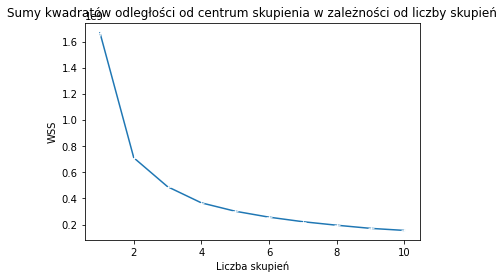

In [28]:
plt.title("Sumy kwadratów odległości od centrum skupienia w zależności od liczby skupień")
sns.lineplot(x='Clusters', y='WSS', data=centers, marker="+")
plt.xlabel("Liczba skupień");


Kolejno przeprowadzono podział na 4 skupienia, na podstawie punktu, w którym powyższy wykres zaczyna się wypłaszczać.

In [29]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans = kmeans.fit(hotel_adr_lt[['lead_time', 'adr']])

Otrzymane wyniki przypisano do nowej kolumny "Clusters" w ramce danych, w celu dalszego jej wykorzystania.

In [30]:
hotel_df['Clusters'] = kmeans.labels_

Liczność poszczególnych skupień przedstawiono poniżej.

In [31]:
hotel_df['Clusters'].value_counts()

1    49773
2    32037
3    23102
0    14478
Name: Clusters, dtype: int64

Poniżej przedstawiono wykres punktowy pogrupowany w skupienia.
Kolorem niebieskim zaznaczono klientów o najwyższym ADR i małym czasie wyprzedzenia rezerwacji.
Kolorem pomarańczwym natomiast zaznaczono grupę klientów najmniej dochodowych, o znacznym wyprzedzeniu rezerwacji.

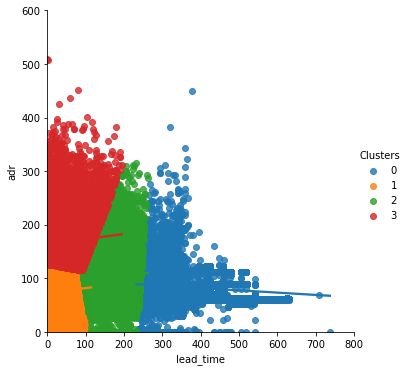

In [32]:
sns.lmplot(x="lead_time", y="adr", hue='Clusters', data=hotel_df)
plt.ylim(0, 600)
plt.xlim(0, 800)
plt.show()

Na podstawie analizy skupień można przeprowadzić dalszą analizę dla poszczególnych grup klientów.
Przykładowo na poniższym wykresie wykonano ponowne zliczenie liczby rezerwacji dla klientów z poszczególnych krajów w najbardziej dochodowej grupie.
Porównując z poprzednim analogicznym wykresem widać mniejszą dysproporcję między klientami portugalskimi, kolejno prezentują się Hiszpania, Francja oraz Wielka brytania (poprzednio kolejność tych 3 krajów była odwrotna).

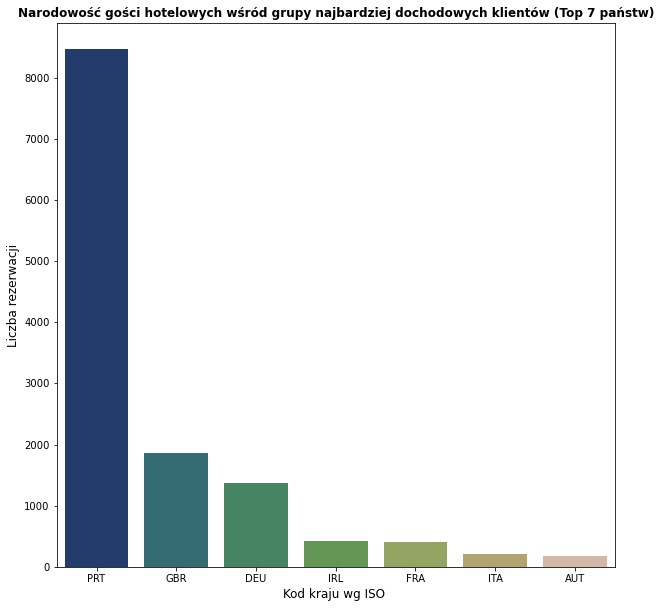

In [33]:
hotel_most_profitable = hotel_df[hotel_df['Clusters'] == 0]
hotel_most_profitable.describe()

plt.figure(figsize=(10, 10))
sns.countplot(x='country', data=hotel_most_profitable,
              order=pd.value_counts(hotel_most_profitable['country']).iloc[:7].index, palette="gist_earth")
plt.title('Narodowość gości hotelowych wśród grupy najbardziej dochodowych klientów (Top 7 państw)', weight='bold')
plt.xlabel('Kod kraju wg ISO ', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12);

### 4. Podsumowanie

Na podstawie analizowanych danych można wyciągnąć wiele wniosków. Najbardziej obleganymi przez turystów miesiącami były miesiące letnie, najmniej zaś miesiące zimowe.
Bazując na najczęściej występującej narodowości gości można założyć, iż ośrodki znajdują się w Portugalii.
Zauważono również, iż goście częściej wybierają na dłuższe pobyty Resort Hotel (hotel ten jest bardziej "wakacyjny) od hotelu miejskiego.
Rok 2016 według liczby rezerwacji przewyższał dla obu ośrodków lata 2015 i 2017.
Głównym kanałem rezerwacji w dzisiejszych czasach są biura podróży, co potwierdzają powyższe wykresy.
Dokonując analizy skupień można wyodrębnić specyficzne grupy klientów, a następnie przeprowadzać kolejne analizy dla
interesującej nas grupy np. najbardziej dochodowych klientów.